# **PHÂN TÍCH KHÁM PHÁ DỮ LIỆU DỰ ĐOÁN BỆNH TIỂU ĐƯỜNG PIMA INDIANS**

**Thực hiện thống kê mô tả trên tập dữ liệu về bệnh tiểu đường.**  
Dữ liệu lấy tại
https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906

## **Import thư viện**

In [15]:
# Import thư viện
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho biểu đồ
plt.style.use('default')
sns.set_palette("husl")

## **Đọc dữ liệu diabetes.csv**

In [16]:
# Đọc dữ liệu pima_indians_diabetes
pima_data = pd.read_csv('data/diabetes.csv')

In [17]:
# Xem kích thước dữ liệu
print("Kích thước dữ liệu:", pima_data.shape)

Kích thước dữ liệu: (768, 9)


In [18]:
# Xem thông tin dữ liệu
print("\nThông tin dữ liệu:")
pima_data.info()


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Phân tích các cột quan trọng**

### **Tính correlation để xác định các cột quan trọng**  

**Mục tiêu**:  
1. Tính correlation (hệ số tương quan) giữa tất cả các thuộc tính với cột `Outcome` (chất lượng rượu vang)
2. Sắp xếp các thuộc tính theo mức độ tương quan từ cao đến thấp
3. In ra bảng correlation để xem thuộc tính nào có ảnh hưởng mạnh nhất đến chất lượng  

**Ý nghĩa**:  
1. Correlation gần +1 = ảnh hưởng tích cực mạnh (thuộc tính tăng → chất lượng tăng)  
2. Correlation gần -1 = ảnh hưởng tiêu cực mạnh (thuộc tính tăng → chất lượng giảm)  
3. Correlation gần 0 = ít ảnh hưởng hoặc không ảnh hưởng  

In [19]:
# Tính correlation giữa các thuộc tính và Outcome
correlation_with_outcome = pima_data.corr()['Outcome'].sort_values(ascending=False)

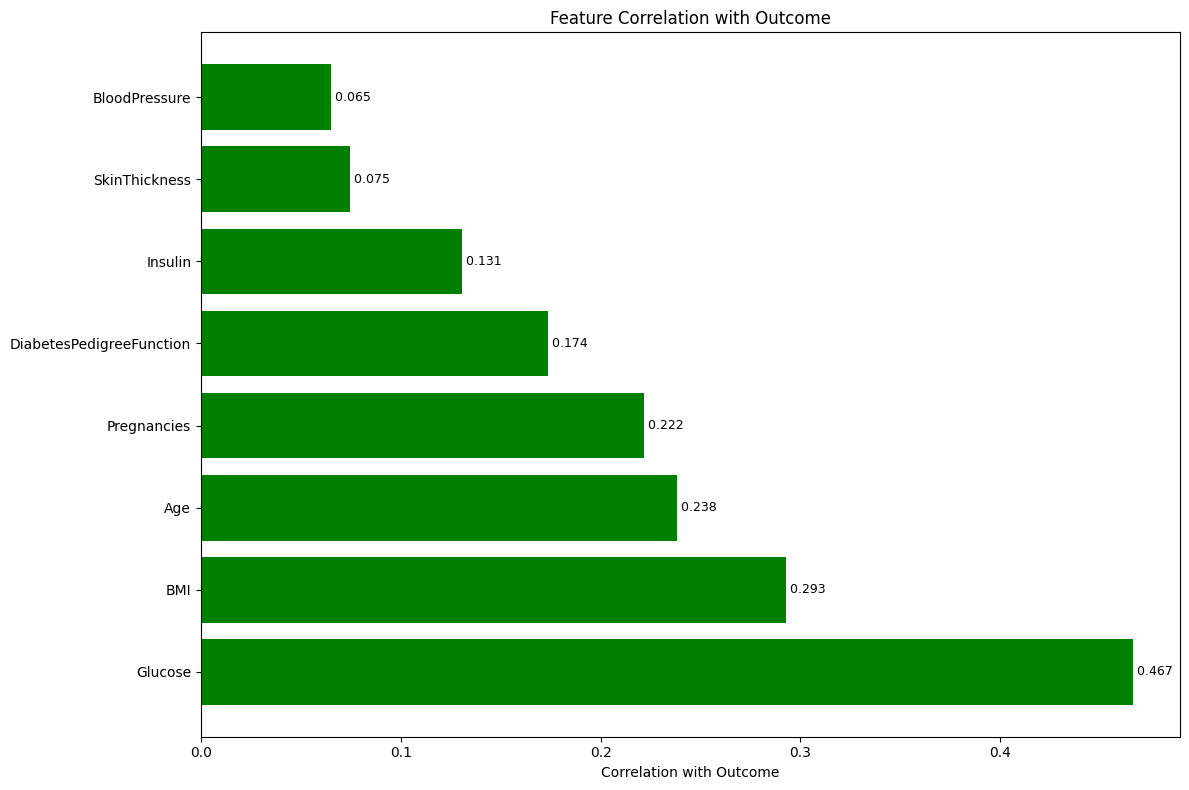

In [20]:
# 1. Biểu đồ cột ngang (Bar chart) - Correlation của tất cả thuộc tính
plt.figure(figsize=(12, 8))
# Loại bỏ Outcome khỏi danh sách để vẽ
corr_plot = correlation_with_outcome[correlation_with_outcome.index != 'Outcome']
# Tạo màu sắc: xanh cho tích cực, đỏ cho tiêu cực
colors = ['green' if x > 0 else 'red' for x in corr_plot.values]
# Vẽ biểu đồ ngang
plt.barh(corr_plot.index, corr_plot.values, color=colors)
plt.xlabel('Correlation with Outcome')
plt.title('Feature Correlation with Outcome')
# Thêm giá trị correlation vào biểu đồ
for i, (idx, val) in enumerate(corr_plot.items()):
    plt.text(val, i, f' {val:.3f}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

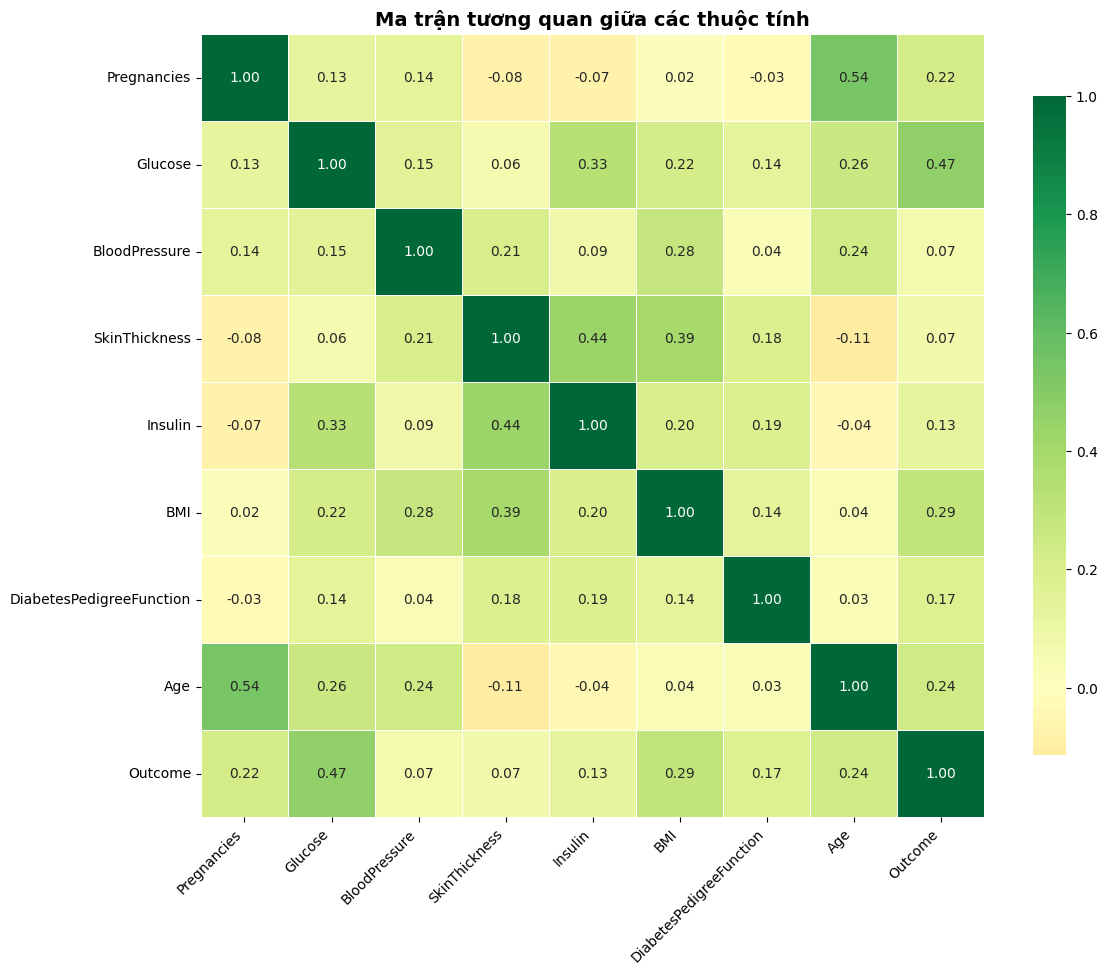

In [21]:
# 2. Heatmap - Ma trận tương quan của tất cả các thuộc tính
plt.figure(figsize=(12, 10))

# Tính ma trận correlation cho tất cả các cột
correlation_matrix = pima_data.corr()
# Vẽ heatmap
sns.heatmap(correlation_matrix,
            annot=True,  # Hiển thị giá trị
            fmt='.2f',   # Định dạng 2 chữ số thập phân
            cmap='RdYlGn',  # Màu: đỏ (âm) -> vàng (0) -> xanh (dương)
            center=0,    # Tâm màu tại 0
            square=True, # Ô vuông
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Ma trận tương quan giữa các thuộc tính', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Kết luận**
Sau khi tính toán và trực quan hóa ma trận tương quan, ta có thể rút ra một số kết luận về các thuộc tính quan trọng ảnh hưởng đến biến mục tiêu `Outcome` trong bộ dữ liệu Pima Indians Diabetes:
1. Các thuộc tính ảnh hưởng tích cực với `Outcome`:
    - `Glucose` (0.47): Mức đường huyết có correlation dương mạnh với `Outcome`, cho thấy mức đường huyết cao có liên quan đến nguy cơ mắc bệnh tiểu đường.
 2. Các thuộc tính ảnh hưởng tiêu cực với `Outcome`:
    - Không có thuộc tính nào có correlation âm đáng kể với `Outcome` trong bộ dữ liệu này.
 3. Các thuộc tính có correlation trung bình với `Outcome`:
    - `BMI` (0.293): Chỉ số khối cơ thể có correlation dương trung bình với `Outcome`, cho thấy người có BMI cao có nguy cơ mắc bệnh tiểu đường.
    - `Age` (0.238): Tuổi tác cũng có correlation dương trung bình với `Outcome`, cho thấy nguy cơ mắc bệnh tiểu đường tăng theo tuổi.
    - `Pregnancies`(0.221): Số lần mang thai có correlation dương trung bình với `Outcome`, cho thấy phụ nữ mang thai nhiều lần có nguy cơ mắc bệnh tiểu đường cao hơn.
    - `DiabetesPedigreeFunction` (0.173): Chức năng di truyền tiểu đường có correlation dương trung bình với 'Outcome', cho thấy yếu tố di truyền có thể ảnh hưởng đến nguy cơ mắc bệnh tiểu đường.
    - `Insulin` (0.130): Mức insulin có correlation dương yếu với `Outcome`, cho thấy mức insulin cao có thể liên quan đến nguy cơ mắc bệnh tiểu đường.
 4. Các thuộc tính ít ảnh hưởng đến 'Outcome':
    - `BloodPressure` (0.065): Huyết áp có correlation dương yếu với `Outcome`, cho thấy huyết áp không phải là yếu tố quan trọng trong việc dự đoán bệnh tiểu đường.
    - `SkinThickness` (0.074): Độ dày da có correlation dương yếu với `Outcome`, cho thấy độ dày da không phải là yếu tố quan trọng trong việc dự đoán bệnh tiểu đường.  

**Kết luận**: Để dự đoán nguy cơ mắc bệnh tiểu đường, cần tập trung vào các thuộc tính như `Glucose`, `BMI`, `Age`, `Pregnancies`, `DiabetesPedigreeFunction` và `Insulin`.


## **Lọc các cột quan trọng**

In [22]:
# Lọc các cột có correlation > 0.1
important_features = correlation_with_outcome[abs(correlation_with_outcome) > 0.1]
important_features = important_features[important_features.index != 'Outcome']
print("=" * 70)
print("CÁC CỘT QUAN TRỌNG NHẤT (|correlation| > 0.1):")
print("=" * 70)
for col, corr in important_features.items():
    impact = "✓ Tích cực (càng cao càng tốt)" if corr > 0 else "✗ Tiêu cực (càng cao càng xấu)"
    print(f"{col:30s}: {corr:7.4f} - {impact}")
print(f"\n→ Có {len(important_features)} cột quan trọng trong tổng số {len(pima_data.columns)-1} cột")

CÁC CỘT QUAN TRỌNG NHẤT (|correlation| > 0.1):
Glucose                       :  0.4666 - ✓ Tích cực (càng cao càng tốt)
BMI                           :  0.2927 - ✓ Tích cực (càng cao càng tốt)
Age                           :  0.2384 - ✓ Tích cực (càng cao càng tốt)
Pregnancies                   :  0.2219 - ✓ Tích cực (càng cao càng tốt)
DiabetesPedigreeFunction      :  0.1738 - ✓ Tích cực (càng cao càng tốt)
Insulin                       :  0.1305 - ✓ Tích cực (càng cao càng tốt)

→ Có 6 cột quan trọng trong tổng số 8 cột


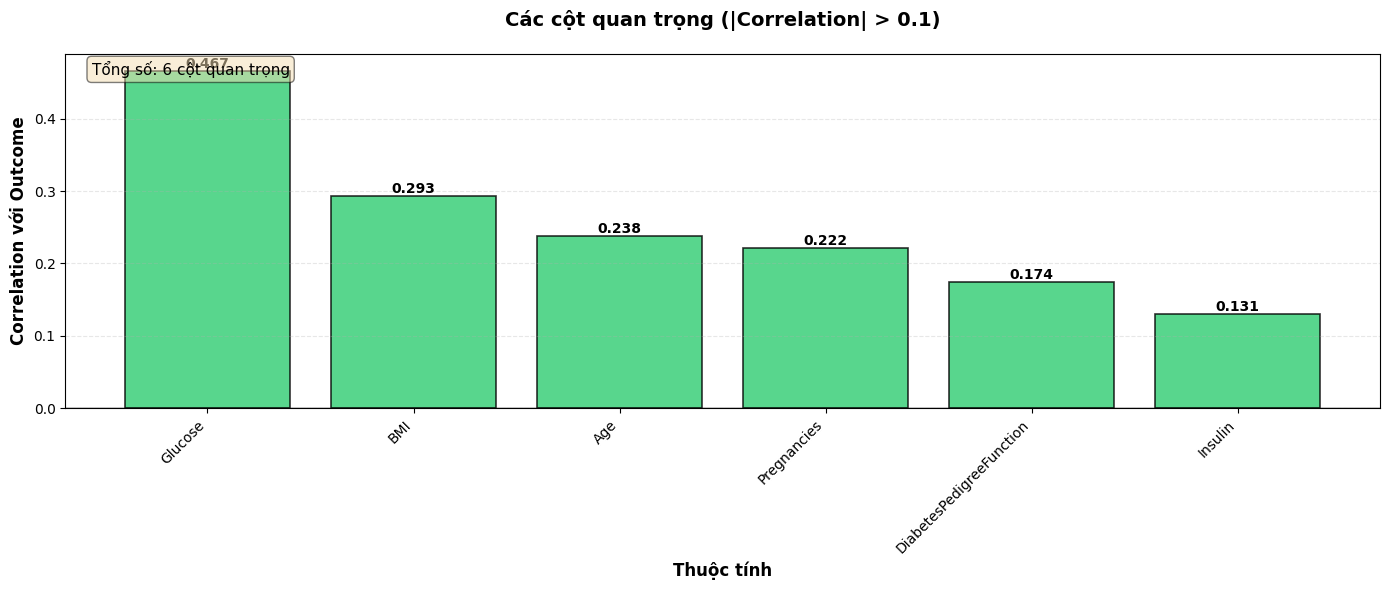

In [23]:
# Biểu đồ cột đứng - So sánh các cột quan trọng
plt.figure(figsize=(14, 6))
# Tạo màu sắc: xanh dương cho tích cực, đỏ cam cho tiêu cực
colors_important = ['#2ecc71' if x > 0 else '#e74c3c' for x in important_features.values]
# Vẽ biểu đồ cột đứng
bars = plt.bar(range(len(important_features)), important_features.values, color=colors_important, alpha=0.8, edgecolor='black', linewidth=1.2)
# Thiết lập nhãn
plt.xlabel('Thuộc tính', fontsize=12, fontweight='bold')
plt.ylabel('Correlation với Outcome', fontsize=12, fontweight='bold')
plt.title('Các cột quan trọng (|Correlation| > 0.1)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(important_features)), important_features.index, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='y', alpha=0.3, linestyle='--')
# Thêm giá trị lên đầu mỗi cột
for i, (idx, val) in enumerate(important_features.items()):
    plt.text(i, val, f'{val:.3f}', ha='center', va='bottom' if val > 0 else 'top', fontsize=10, fontweight='bold')
# Thêm chú thích
plt.text(0.02, 0.98, f'Tổng số: {len(important_features)} cột quan trọng',
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
plt.show()

**Kết luận:**
Sau khi lọc và phân tích các cột quan trọng, ta có những kết luận sau:
1. Tổng số cột quan trọng: 6/8 cột (75% tổng số cột)
    - Các cột đều có ảnh hưởng tích cực đến Outcome, tức là giá trị càng cao thì khả năng mắc bệnh tiểu đường càng cao.
2. Độ mạnh ảnh hưởng:
    - Mạnh nhất: `Glucose` (0.467)
    - Trung bình: `BMI` (0.292), `Age` (0.238), `Pregnancies` (0.221), `DiabetesPedigreeFunction` (0.174)
    - Yếu: `Insulin` (0.131)  
3. Các cột không quan trọng:
    - `BloodPressure` và `SkinThickness` có correlation rất thấp (<0.1), có thể xem xét loại bỏ trong các mô hình dự đoán.  

=> Khi xây dựng mô hình dự đoán bệnh tiểu đường, nên tập trung vào các cột quan trọng đã xác định để cải thiện hiệu suất và độ chính xác của mô hình. Giúp giảm độ phức tạp và vẫn giữ được độ chính xác cao.


## **Lấy các cột quan trọng**

In [24]:
# Lấy các cột cần thiết
important_cols = important_features.index.tolist() + ['Outcome']
pima_data = pima_data[important_cols]

**Ý nghĩa của từng cột**
| Tên cột                   | Ý nghĩa                                                                                       |
|---------------------------|----------------------------------------------------------------------------------------------|
| **Pregnancies**           | Số lần mang thai của bệnh nhân.                                                              |
| **Glucose**               | Nồng độ glucose trong huyết tương (mg/dL) sau khi nhịn ăn.                                   |
| **Insulin**               | Nồng độ insulin trong huyết thanh (mu U/ml) sau khi nhịn ăn.                                 |
| **BMI**                   | Chỉ số khối cơ thể (Body Mass Index) = cân nặng (kg) / (chiều cao (m))².                     |
| **DiabetesPedigreeFunction** | Chức năng phả hệ tiểu đường, phản ánh yếu tố di truyền nguy cơ mắc bệnh tiểu đường.      |
| **Age**                   | Tuổi của bệnh nhân (năm).                                                                    |
| **Outcome**               | Kết quả chẩn đoán: 1 = mắc bệnh tiểu đường, 0 = không mắc bệnh tiểu đường.                   |

- **Xem thông tin sơ bộ**

In [25]:
# Xem trước 5 dòng dữ liệu
pima_data.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,148,33.6,50,6,0.627,0,1
1,85,26.6,31,1,0.351,0,0
2,183,23.3,32,8,0.672,0,1
3,89,28.1,21,1,0.167,94,0
4,137,43.1,33,0,2.288,168,1


In [26]:
# Xem kiểu dữ liệu của các cột
pima_data.dtypes

,0
Glucose,int64
BMI,float64
Age,int64
Pregnancies,int64
DiabetesPedigreeFunction,float64
Insulin,int64
Outcome,int64


In [27]:
# Xem kích thước dữ liệu
pima_data.shape

(768, 7)

=> 768 hàng, 7 cột

## **Làm sạch dữ liệu**

### **Loại bỏ dữ liệu trùng lặp**

In [28]:
# Xem các dòng trùng lặp
pima_data[pima_data.duplicated(keep=False)]

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome


=> Không cần xóa dữ liệu trùng lặp

### **Xử lý dữ liệu bị thiếu**

In [29]:
# Xem các giá trị bị thiếu trong từng cột
nan_counts = pima_data.isnull().sum()
print("Số lượng giá trị bị thiếu trong từng cột:")
print(nan_counts)

Số lượng giá trị bị thiếu trong từng cột:
Glucose                     0
BMI                         0
Age                         0
Pregnancies                 0
DiabetesPedigreeFunction    0
Insulin                     0
Outcome                     0
dtype: int64


**Kết luận**: Sau khi kiểm tra số lượng giá trị NaN trong từng cột của dữ liệu:  
- Tất cả các cột đều không có giá trị NaN (không có dữ liệu bị thiếu).
- Dữ liệu đầy đủ, không cần thực hiện thao tác thay thế hoặc loại bỏ giá trị thiếu.

### **Xử lý giá trị bằng 0**

Số lượng giá trị bằng 0 trong từng cột (trừ Outcome và Pregnancies):
Glucose                       5
BMI                          11
Age                           0
DiabetesPedigreeFunction      0
Insulin                     374
dtype: int64


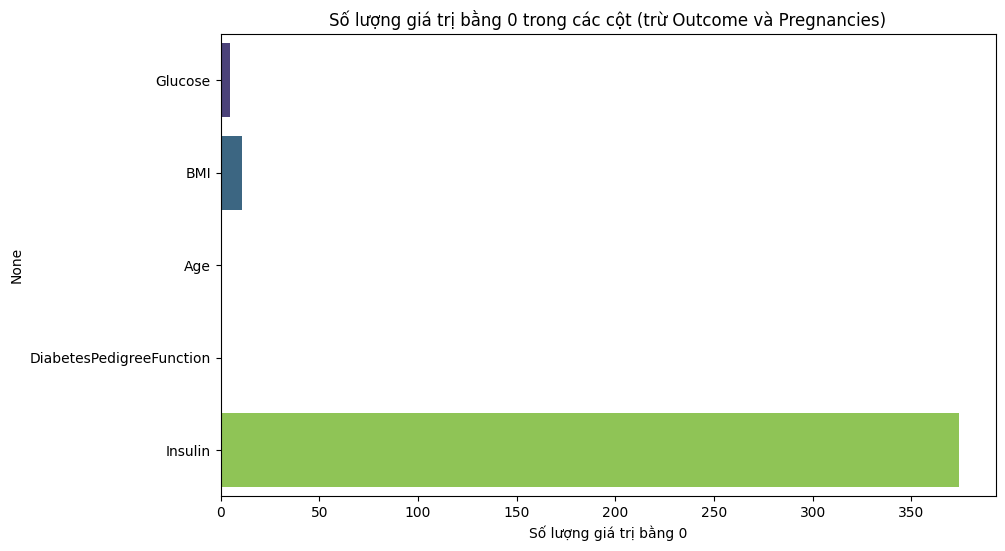

In [30]:
# Xem các giá trị bằng 0 trong các cột trừ Outcome và Pregnancies
zero_value_counts = (pima_data.drop(columns=['Outcome', 'Pregnancies']) == 0).sum()
print("Số lượng giá trị bằng 0 trong từng cột (trừ Outcome và Pregnancies):")
print(zero_value_counts)
# Vẽ biểu đồ cột ngang cho các giá trị bằng 0
plt.figure(figsize=(10, 6))
sns.barplot(x=zero_value_counts.values, y=zero_value_counts.index, palette='viridis', hue =zero_value_counts.index)
plt.xlabel('Số lượng giá trị bằng 0')
plt.title('Số lượng giá trị bằng 0 trong các cột (trừ Outcome và Pregnancies)')
plt.show()

In [31]:
# Thay thế các giá trị 0 trong cột Glucose, BMI, Insulin bằng giá trị trung vị
pima_data['Glucose'] = pima_data['Glucose'].replace(0, pima_data['Glucose'].median())
pima_data['BMI'] = pima_data['BMI'].replace(0, pima_data['BMI'].median())
pima_data['Insulin'] = pima_data['Insulin'].replace(0, pima_data['Insulin'].median())

In [32]:
# Xem lại số lượng giá trị bằng 0 sau khi thay thế
zero_value_counts_after = (pima_data.drop(columns=['Outcome', 'Pregnancies']) == 0).sum()
print("Số lượng giá trị bằng 0 trong từng cột sau khi thay thế (trừ Outcome và Pregnancies):")
print(zero_value_counts_after)

Số lượng giá trị bằng 0 trong từng cột sau khi thay thế (trừ Outcome và Pregnancies):
Glucose                     0
BMI                         0
Age                         0
DiabetesPedigreeFunction    0
Insulin                     0
dtype: int64


### **Xử lý các giá trị ngoại lai**

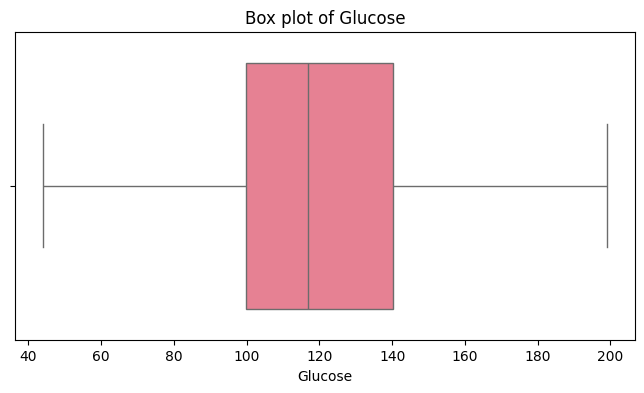

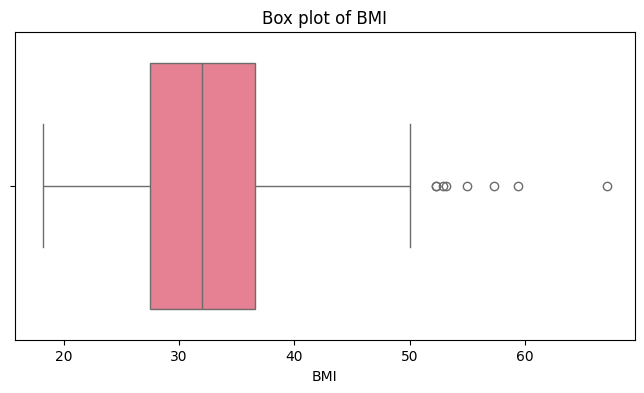

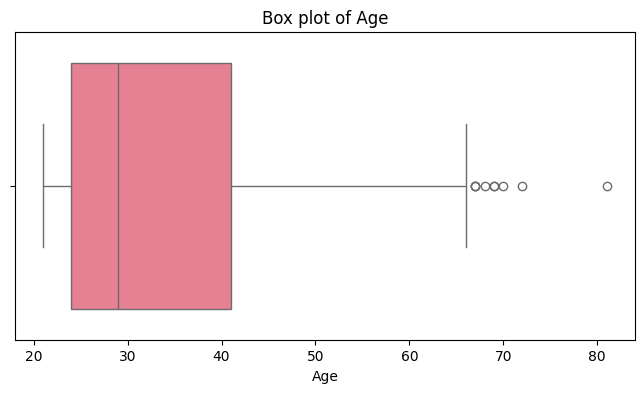

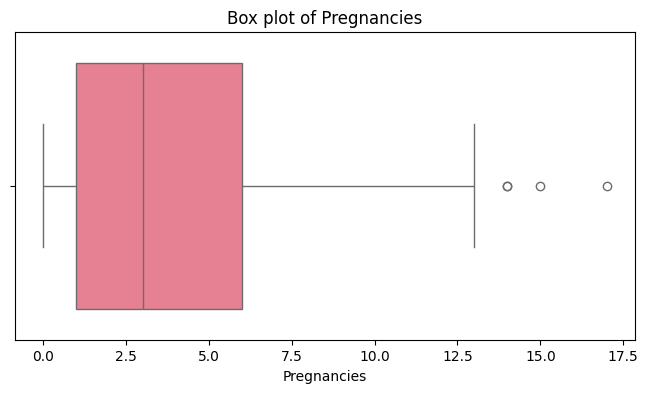

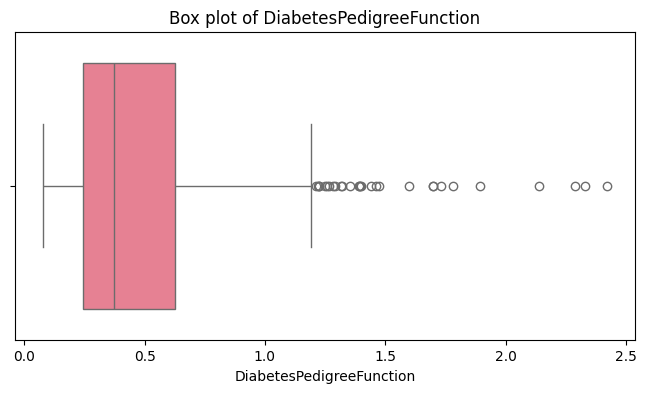

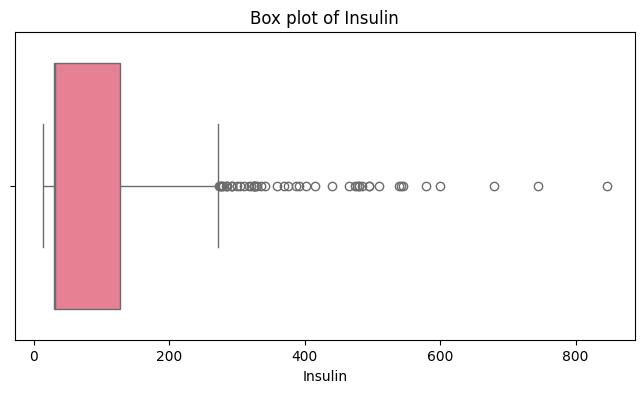

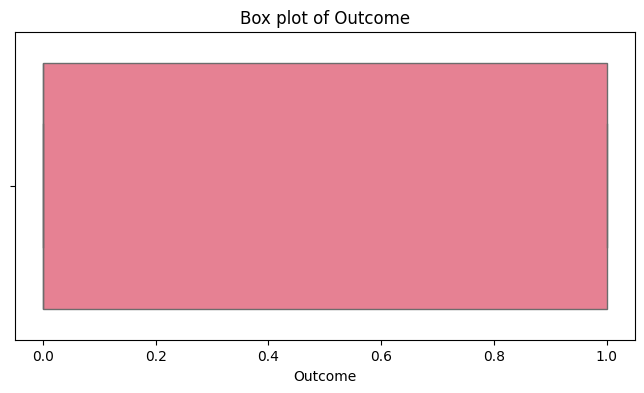

In [33]:
# Kiểm tra các giá trị bất thường trong tất cả các cột bằng biểu đồ hộp (box plot)
for column in pima_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=pima_data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

**Các cột cần xử lý ngoại lai**

**1. Insulin (Nồng độ insulin trong máu):**
- Insulin có thể biến động lớn, nhưng giá trị quá cao/thấp thường không hợp lý về mặt y học và có thể do lỗi kỹ thuật.
- Ngoại lai ở cột này sẽ ảnh hưởng đến phân tích mối liên hệ giữa insulin và nguy cơ tiểu đường.
- **Nên xử lý ngoại lai** để tăng độ tin cậy cho mô hình dự đoán.

**2. BMI (Chỉ số khối cơ thể):**
- BMI quá cao/thấp thường là do lỗi nhập liệu hoặc đo lường, vì chỉ số này ở người trưởng thành thường nằm trong một khoảng hợp lý.
- Ngoại lai có thể làm sai lệch phân tích về ảnh hưởng của béo phì đến bệnh tiểu đường.
- **Nên xử lý ngoại lai** để dữ liệu phản ánh đúng thực tế sức khỏe.

**Các cột còn lại:**
- **Pregnancies, Age, DiabetesPedigreeFunction, BloodPressure, SkinThickness**: Giá trị ngoại lai có thể là đặc trưng tự nhiên của từng cá nhân hoặc phản ánh sự đa dạng sinh học, nếu không quá bất hợp lý về mặt y học thì **không cần xử lý ngoại lai**.


---

**Hàm xử lý giá trị ngoại lai bằng phương pháp IQR**

- Phương pháp IQR (Interquartile Range) dùng để phát hiện và xử lý các giá trị ngoại lai (outlier) trong dữ liệu.
- IQR là khoảng giữa tứ phân vị thứ 1 (Q1 - 25%) và tứ phân vị thứ 3 (Q3 - 75%) của dữ liệu.
- Các giá trị nằm ngoài khoảng `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]` được coi là ngoại lai.
- Hàm này sẽ thay thế các giá trị nhỏ hơn `Q1 - 1.5*IQR` bằng giá trị biên dưới, và các giá trị lớn hơn `Q3 + 1.5*IQR` bằng giá trị biên trên.

**Công thức:**
- Q1 = Phân vị thứ 1 (25%)
- Q3 = Phân vị thứ 3 (75%)
- IQR = Q3 - Q1
- Biên dưới: `lower_bound = Q1 - 1.5 * IQR`
- Biên trên: `upper_bound = Q3 + 1.5 * IQR`
- Nếu giá trị < `lower_bound` → thay bằng `lower_bound`
- Nếu giá trị > `upper_bound` → thay bằng `upper_bound`

In [34]:
# Hàm xử lý các giá trị ngoại lai bằng phương pháp IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [35]:
# Áp dụng hàm xử lý ngoại lai cho các cột 'Insulin' và 'BMI'
handle_outliers_iqr(pima_data, 'Insulin')
handle_outliers_iqr(pima_data, 'BMI')

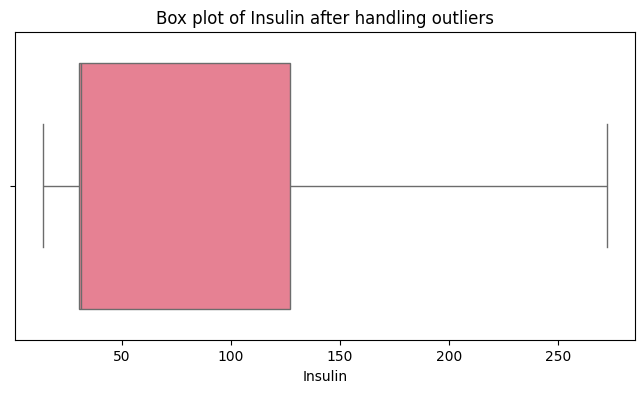

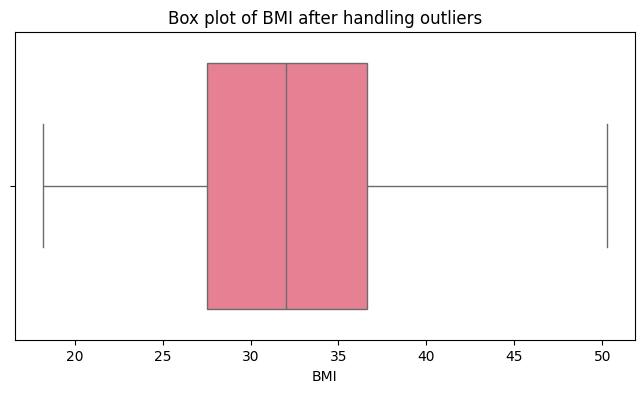

In [36]:
# Xem lại biểu đồ hộp sau khi xử lý ngoại lai
for column in ['Insulin', 'BMI']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=pima_data[column])
    plt.title(f'Box plot of {column} after handling outliers')
    plt.show()

# **XỬ LÝ VÀ TRỰC QUAN HOÁ DỮ LIỆU**

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.  Trực quan hóa Dữ liệu với Thư viện Matplotlib

**Khai báo các thư viên liên quan**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Khai báo các thư viện phục vụ phân tích và trực quan hóa dữ liệu**

*   **pandas**: Thư viện này được sử dụng để tải, xử lý và thao tác với dữ liệu dạng bảng (DataFrame), cho phép thực hiện các tác vụ như đọc tệp CSV, lọc dữ liệu, tính toán thống kê mô tả và chuẩn bị dữ liệu cho phân tích.
*   **numpy**: Cung cấp các chức năng hỗ trợ tính toán số học hiệu quả, đặc biệt là làm việc với mảng đa chiều và các phép toán ma trận. NumPy là nền tảng cho nhiều thư viện khoa học khác trong Python.
*   **matplotlib.pyplot**: Module này cung cấp một giao diện lập trình cho việc tạo các biểu đồ và đồ thị tĩnh, tương tác trong Python. Nó được sử dụng để tùy chỉnh và hiển thị các trực quan hóa dữ liệu.
*   **seaborn**: Dựa trên Matplotlib, Seaborn chuyên về tạo các biểu đồ thống kê. Thư viện này giúp tạo ra các trực quan hóa phức tạp một cách dễ dàng hơn, hỗ trợ khám phá và hiểu cấu trúc dữ liệu.

#Case 1: Phân tích Rủi ro theo Tuổi (Boxplot)

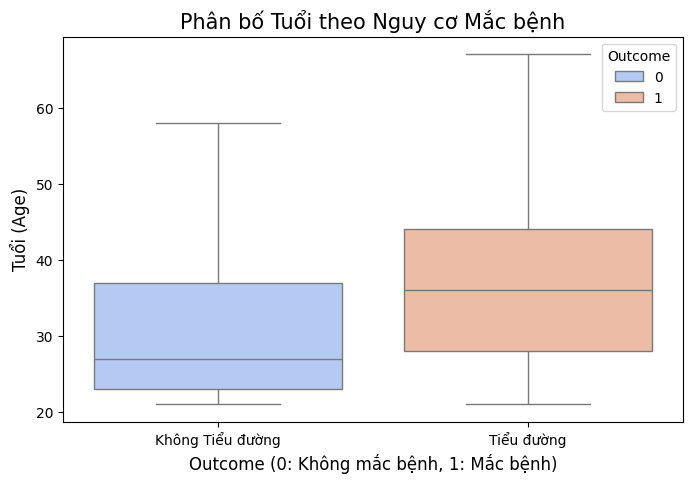

In [63]:
# Case 1: Phân tích Rủi ro theo Tuổi (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Age', data=pima_data, palette='coolwarm', hue='Outcome', showfliers=False)
plt.xlabel('Outcome (0: Không mắc bệnh, 1: Mắc bệnh)', fontsize=12)
plt.ylabel('Tuổi (Age)', fontsize=12)
plt.title('Phân bố Tuổi theo Nguy cơ Mắc bệnh', fontsize=15)
plt.xlabel('Outcome (0: Không mắc bệnh, 1: Mắc bệnh)', fontsize=12)
plt.ylabel('Tuổi (Age)', fontsize=12)
plt.xticks([0, 1], ['Không Tiểu đường', 'Tiểu đường'])
plt.savefig('/content/drive/MyDrive/PTDL 25-26/lab01-Xử lý trực quan hoá dữ liệu/img/case1_age_outcome_boxplot.png')
plt.show()
plt.close()

**Nhận xét:** Biểu đồ này xác nhận ngay lập tức rằng tuổi tác là một yếu tố nguy cơ không thể phủ nhận. Trung vị tuổi (đường kẻ giữa) của nhóm mắc bệnh (Outcome=1) cao hơn rõ rệt (khoảng 37 tuổi) so với nhóm không mắc bệnh (26 tuổi). Sự chênh lệch này cảnh báo rằng, sau khi vượt qua tuổi 30, nguy cơ phát triển bệnh tiểu đường tăng lên đáng kể. Điều này nhấn mạnh sự cần thiết phải tăng cường các chương trình sàng lọc cho nhóm dân số lớn tuổi hơn.

# Case 2: Mật độ Số lần Mang thai và Tuổi theo Outcome

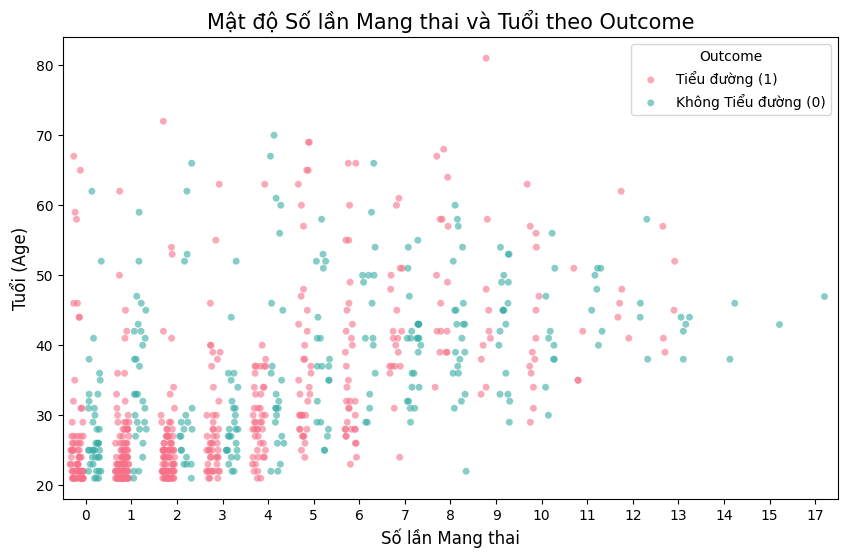

In [64]:
# Case 2: Phân tích Mật độ Số lần Mang thai (Categorical Scatter)
plt.figure(figsize=(10, 6))
sns.stripplot(x='Pregnancies', y='Age', hue='Outcome', data=pima_data,
              dodge=True, jitter=0.3, alpha=0.6, palette='husl')
plt.title('Mật độ Số lần Mang thai và Tuổi theo Outcome', fontsize=15)
plt.xlabel('Số lần Mang thai', fontsize=12)
plt.ylabel('Tuổi (Age)', fontsize=12)
plt.legend(title='Outcome', labels=['Tiểu đường (1)', 'Không Tiểu đường (0)'])
plt.savefig('/content/drive/MyDrive/PTDL 25-26/lab01-Xử lý trực quan hoá dữ liệu/img/case2_pregnancies_outcome_scatter.png')
plt.show()
plt.close()

**Nhận xét:** Biểu đồ này tiết lộ một sự thật rõ ràng về rủi ro sinh sản: trong khi nhóm khỏe mạnh tập trung nhiều ở mức mang thai 0 đến 3 lần, thì các trường hợp mắc bệnh (Outcome=1, chấm đỏ) bắt đầu chiếm ưu thế từ ngưỡng 4 lần mang thai trở lên. Hầu hết các ca mắc bệnh ở mức mang thai cao (>6 lần) đều là phụ nữ lớn tuổi. Insight này cung cấp một điểm cắt sàng lọc hiệu quả: Phụ nữ có tiền sử mang thai nhiều lần nên được coi là nhóm rủi ro cao, bất kể các yếu tố trao đổi chất khác.

# Case 3: Phân tách Mật độ Glucose giữa hai nhóm Outcome

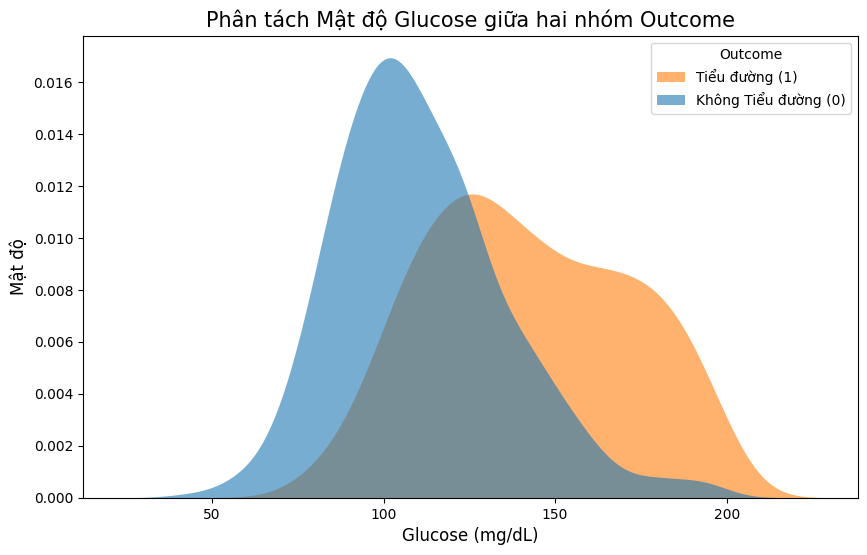

In [65]:
# Case 3: Phân tách Mật độ Glucose (KDE Plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=pima_data, x='Glucose', hue='Outcome', fill=True, common_norm=False, palette='tab10', alpha=.6, linewidth=0)
plt.title('Phân tách Mật độ Glucose giữa hai nhóm Outcome', fontsize=15)
plt.xlabel('Glucose (mg/dL)', fontsize=12)
plt.ylabel('Mật độ', fontsize=12)
plt.legend(title='Outcome', labels=['Tiểu đường (1)', 'Không Tiểu đường (0)'])
plt.savefig('/content/drive/MyDrive/PTDL 25-26/lab01-Xử lý trực quan hoá dữ liệu/img/case3_glucose_kde.png')
plt.show()
plt.close()

**Nhận xét:** Biểu đồ mật độ này cung cấp bằng chứng trực quan mạnh mẽ về khả năng phân loại của Glucose. Đường cong mật độ cho nhóm mắc bệnh (Outcome=1, màu cam) dịch chuyển rõ rệt sang phải và có đỉnh cao hơn so với nhóm không mắc bệnh (Outcome=0). Điều quan trọng là, tại mức 140 mg/dL, đường mật độ của nhóm mắc bệnh bắt đầu chiếm ưu thế tuyệt đối. Insight này xác định một ngưỡng nguy hiểm rõ ràng (>140 mg/dL), cho thấy Glucose là chỉ dấu dự đoán mạnh mẽ nhất.

# **2. Trực quan hóa Dữ liệu với Thư viện Seaborn**

#Case 1: Mạng lưới Tương quan giữa các Yếu tố Rủi ro

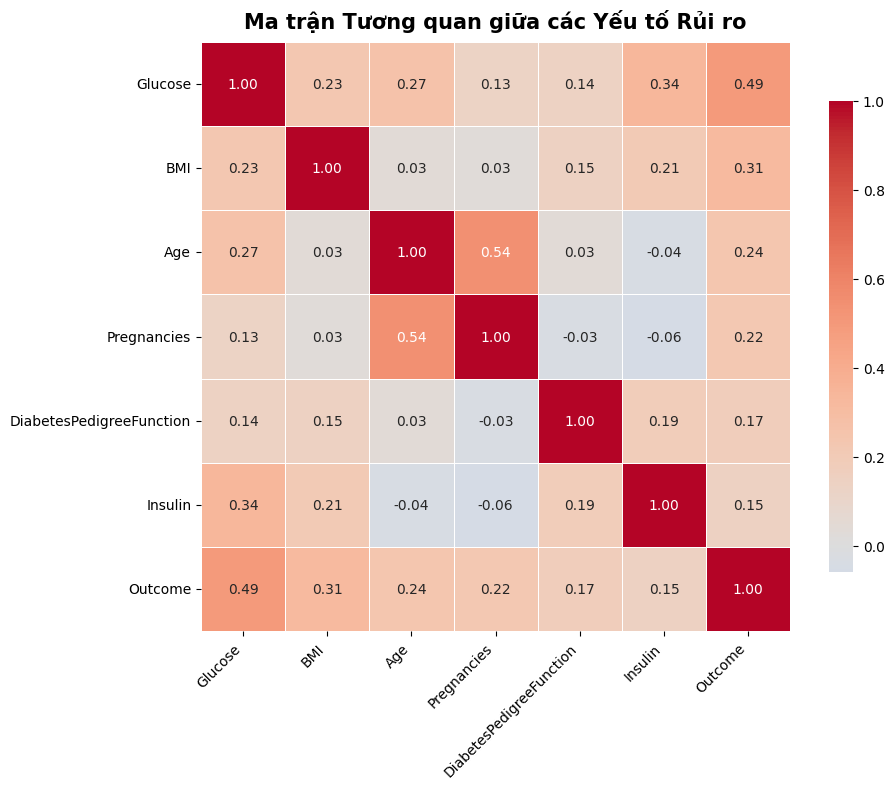

In [66]:
# Case 1: Mạng lưới Tương quan (Heatmap)
plt.figure(figsize=(10, 8))
correlation_matrix = pima_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.8})
plt.title('Ma trận Tương quan giữa các Yếu tố Rủi ro', fontsize=15, fontweight='bold', pad=10)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/PTDL 25-26/lab01-Xử lý trực quan hoá dữ liệu/img/case1_correlation_heatmap.png')
plt.show()
plt.close()

**Nhận xét:** Ma trận tương quan làm sáng tỏ mạng lưới rủi ro của bệnh tiểu đường. Glucose (0.49) là yếu tố có mối tương quan mạnh nhất với Outcome, nhưng tương quan giữa Age và Pregnancies (0.54) cũng rất cao. Điều này gợi ý rằng chúng ta phải xem xét Tuổi và Số lần mang thai như các yếu tố liên quan chặt chẽ, không độc lập. Mặc dù Insulin có tương quan yếu với Outcome, nó lại tương quan mạnh với Glucose (0.34), cho thấy sự rối loạn trao đổi chất nội bộ đang diễn ra.

#Case 2: Nguy cơ Trao đổi chất theo Tuổi (Scatter Plot)

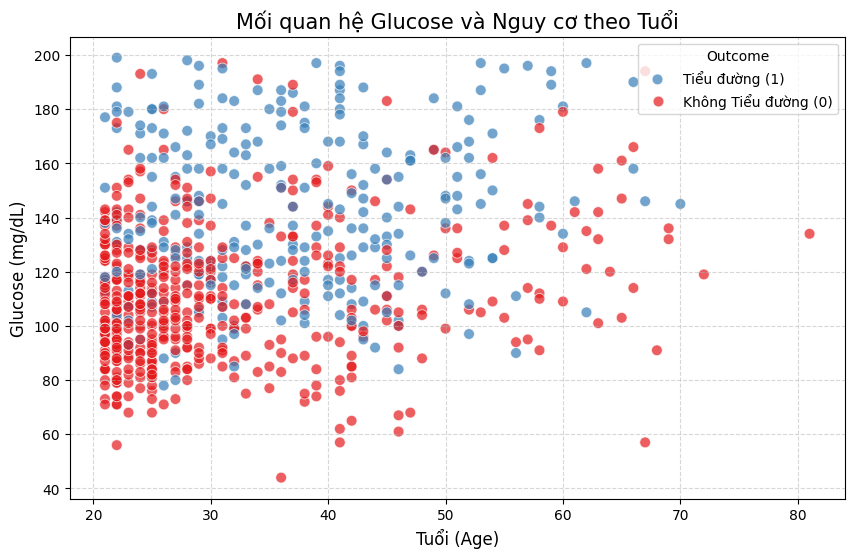

In [67]:
# Case 2: Nguy cơ Trao đổi chất theo Tuổi (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=pima_data, palette='Set1', s=60, alpha=0.7)
plt.title('Mối quan hệ Glucose và Nguy cơ theo Tuổi', fontsize=15)
plt.xlabel('Tuổi (Age)', fontsize=12)
plt.ylabel('Glucose (mg/dL)', fontsize=12)
plt.legend(title='Outcome', labels=['Tiểu đường (1)', 'Không Tiểu đường (0)'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('/content/drive/MyDrive/PTDL 25-26/lab01-Xử lý trực quan hoá dữ liệu/img/case2_glucose_age_scatter.png')
plt.show()
plt.close()

**Nhận xét:** Biểu đồ này cho thấy nguy cơ mắc bệnh tập trung ở hai nhóm. Nhóm thứ nhất là bệnh nhân trẻ tuổi (dưới 35 tuổi) có Glucose rất cao (trên 160 mg/dL), chỉ ra một vấn đề trao đổi chất nghiêm trọng, có thể là bệnh Type 1 hoặc các vấn đề di truyền. Nhóm thứ hai là bệnh nhân lớn tuổi (trên 40 tuổi) có nguy cơ cao, ngay cả khi mức Glucose chỉ ở ngưỡng 140 mg/dL. Điều này cảnh báo về một phạm vi rủi ro rộng cần được quản lý theo hai chiến lược riêng biệt.



#Case 3: Tương tác Yếu tố Trao đổi chất (Joint Plot)

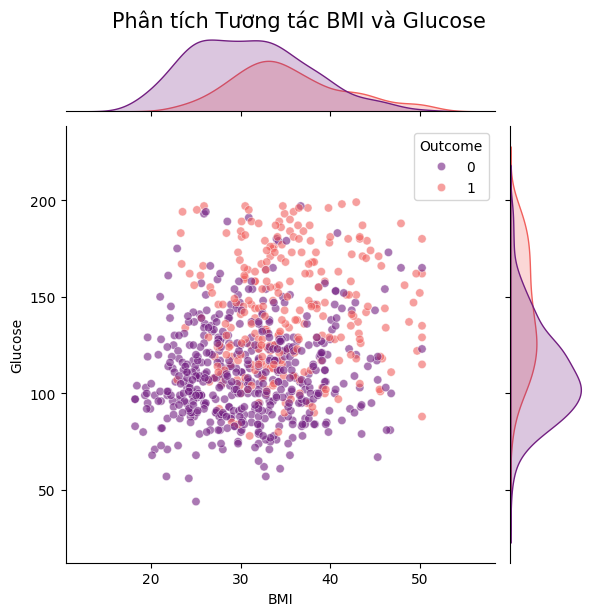

In [68]:
# Case 3: Tương tác Yếu tố Trao đổi chất (Joint Plot)
sns.jointplot(x='BMI', y='Glucose', hue='Outcome', data=pima_data, kind='scatter', palette='magma', alpha=0.6)
plt.suptitle('Phân tích Tương tác BMI và Glucose', y=1.02, fontsize=15)
plt.savefig('/content/drive/MyDrive/PTDL 25-26/lab01-Xử lý trực quan hoá dữ liệu/img/case3_glucose_bmi_joint.png')
plt.show()
plt.close()

**Nhận xét:** Biểu đồ này kết hợp hai chỉ số rủi ro mạnh nhất và xác nhận vùng nguy hiểm rõ ràng của bệnh tiểu đường. Mật độ mắc bệnh (Outcome=1) gần như độc quyền tập trung ở khu vực có BMI trên 30 và Glucose trên 140 mg/dL. Phân tích mật độ rìa cũng cho thấy nhóm mắc bệnh (Outcome=1) có phân bố BMI và Glucose đều dịch chuyển sang phải. Insight này đưa ra một khu vực hành động chính xác: can thiệp phải ưu tiên các bệnh nhân nằm trong vùng BMI ≥30 (Béo phì) VÀ nồng độ Glucose ≥140 mg/dL.

#Kết luận

Phân tích khám phá dữ liệu khẳng định rằng Glucose là chỉ dấu dự đoán mạnh mẽ nhất (r=0.47), với biểu đồ mật độ (KDE Plot) cho thấy sự phân tách rõ rệt giữa nhóm mắc bệnh và nhóm khỏe mạnh. Tuy nhiên, rủi ro mắc bệnh tiểu đường được xác định là chồng chất khi nhiều yếu tố trao đổi chất cùng cao. Cụ thể, nguy cơ lớn nhất tập trung ở nhóm có BMI trên 30 VÀ Glucose trên 140 mg/dL (xác định qua Joint Plot). Ngoài ra, các yếu tố nhân khẩu học Age và Pregnancies cũng là chỉ dấu quan trọng, đặc biệt là phụ nữ lớn tuổi có tiền sử sinh nở cao. Tổng thể, tập dữ liệu có sự mất cân bằng lớp (65% không mắc, 35% mắc), đây sẽ là một điểm cần chú ý khi đánh giá mô hình.